In [ ]:
!pip install folium
!pip install requests
!pip install selenium
!pip install datetime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 467.2/467.2 kB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 592.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.3/247.3 kB 1.6 MB/s eta 0:00:00


Find nearest hospitals for the current location using folium.Map

In [ ]:
# Importing Necessary Modules
import requests
from selenium import webdriver
import folium
import datetime
import time

# this method will return us our actual coordinates
# using our ip address
def locationCoordinates():
    try:
        response = requests.get('https://ipinfo.io/49.206.117.153/json?token=195e151747590f')
        data = response.json()
        loc = data['loc'].split(',')
        lat, long = float(loc[0]), float(loc[1])
        city = data.get('city', 'Unknown')
        state = data.get('region', 'Unknown')
        return lat, long, city, state
    except:
        # Displaying ther error message
        print("Internet Not avialable")
        # closing the program
        exit()
        return False

# this method will fetch our coordinates and create a html file
# of the map
def gps_locator():
    obj = folium.Map(location=[0, 0], zoom_start=2)
    lat, long, city, state = locationCoordinates()
    print("You Are in {},{}".format(city, state))
    print("Your latitude = {} and longitude = {}".format(lat, long))
    find_nearby_hospitals(lat,long)


In [ ]:
import requests
from math import radians, sin, cos, sqrt, atan2

def calculate_distance(lat1, lon1, lat2, lon2):
    # Radius of the Earth in kilometers
    R = 6371.0

    # Convert latitude and longitude from degrees to radians
    lat1_rad = radians(lat1)
    lon1_rad = radians(lon1)
    lat2_rad = radians(lat2)
    lon2_rad = radians(lon2)

    # Calculate the differences between the coordinates
    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad

    # Calculate the distance using the Haversine formula
    a = sin(dlat / 2)**2 + cos(lat1_rad) * cos(lat2_rad) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c

    return distance

def generate_google_maps_link(latitude, longitude):
    return f"https://www.google.com/maps/search/?api=1&query={latitude},{longitude}"

def find_nearby_hospitals(latitude, longitude):
    # Construct the Overpass API query to search for hospitals within a radius of 5 kilometers
    overpass_url = "http://overpass-api.de/api/interpreter"
    overpass_query = f"""
        [out:json];
        (
            node["amenity"="hospital"](around:5000,{latitude},{longitude});
            way["amenity"="hospital"](around:5000,{latitude},{longitude});
            relation["amenity"="hospital"](around:5000,{latitude},{longitude});
        );
        out center;
    """

    # Send a POST request to the Overpass API
    response = requests.post(overpass_url, data=overpass_query)

    # Check if the request was successful
    if response.status_code == 200:
        # Parse the JSON response
        data = response.json()

        # Check if there are any results
        if 'elements' in data:
            hospitals = data['elements']

            # Calculate distances for each hospital
            hospital_distances = []
            for hospital in hospitals:
                name = hospital.get('tags', {}).get('name', 'Unknown')
                lat = hospital.get('lat')
                lon = hospital.get('lon')
                if lat is not None and lon is not None:
                    lat = float(lat)
                    lon = float(lon)
                    distance = calculate_distance(latitude, longitude, lat, lon)
                    hospital_distances.append((name, distance, lat, lon))

            # Sort hospitals by distance
            sorted_hospitals = sorted(hospital_distances, key=lambda x: x[1])

            # Generate Google Maps links for sorted hospitals
            for hospital in sorted_hospitals:
                name, distance, lat, lon = hospital
                google_maps_link = generate_google_maps_link(lat, lon)
                print(f"Hospital: {name}\nDistance: {distance:.2f} km\nGoogle Maps Link: {google_maps_link}\n")
        else:
            print("No hospitals found nearby.")
    else:
        print("Error:", response.status_code)

# Example latitude and longitude (replace with actual coordinates)
latitude =11.032976
longitude =77.0004239

# Call the function to find nearby hospitals
find_nearby_hospitals(latitude, longitude)

Hospital: Nehru Urology Centre
Distance: 1.12 km
Google Maps Link: https://www.google.com/maps/search/?api=1&query=11.0248525,76.9943296

Hospital: Hindusthan Hospital, Coimbatore
Distance: 1.60 km
Google Maps Link: https://www.google.com/maps/search/?api=1&query=11.019682,76.9947731

Hospital: SS Hospital Coimbatore
Distance: 1.63 km
Google Maps Link: https://www.google.com/maps/search/?api=1&query=11.04761,77.000115

Hospital: PSG Hospitals
Distance: 1.74 km
Google Maps Link: https://www.google.com/maps/search/?api=1&query=11.0188398,77.0073136

Hospital: Joseph Hospital, Coimbatore
Distance: 1.76 km
Google Maps Link: https://www.google.com/maps/search/?api=1&query=11.017244,76.9990446

Hospital: Sri Sakthi Hospital, Ganapathi, Coimbatore
Distance: 1.80 km
Google Maps Link: https://www.google.com/maps/search/?api=1&query=11.0474918,76.9930659

Hospital: Sri Ramakrishna Dental Hospital
Distance: 1.85 km
Google Maps Link: https://www.google.com/maps/search/?api=1&query=11.0212988,76.98

Performing EEG analysis to detect driver drowsiness

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Convolution1D, Dropout, MaxPool1D, Convolution2D, MaxPool2D
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from keras.layers import LSTM
from keras import regularizers

In [ ]:
#Loading and preparing the Dataset
#df=pd.read_csv("Feature_Matrix_All.csv")

#df= pd.read_csv('Sub1(Fz,F3,F4) Channels Data.csv')  #Subject 1

#df= pd.read_csv('Sub2(Fz,F3,F4) Channels Data.csv') #Subject 2

df= pd.read_csv('Sub3(Fz,F3,F4) Channels Data.csv')  #Subject 3

ndf=df.drop(['Mode','Min','Max','Median'],axis=1)

#Normalization
dataf=((ndf-ndf.min())/(ndf.max()-ndf.min()))
dataf

#Test and train
X=dataf.drop(['Class'], axis = 1)
y=dataf.Class

X.shape

(360, 5)

In [ ]:
# Reshape Data 2D to 3D for LSTM Input
X=np.array(ndf.iloc[:,:-1])
y=np.array(ndf.iloc[:,-1])
X= X.reshape(-1,5,1)
X.shape

(360, 5, 1)

In [ ]:
# Select train-test split size
test_size = 0.3
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [ ]:
# Long Short Term Memory (LSTM) Model

model = Sequential()
model.add(LSTM(500, input_shape=(5,1),activation='relu'))
#model.add(Dropout(0.2))
#model.add(LSTM(200,input_shape=(5,1),activation='relu'))

model.add(Flatten())

model.add(Dense(250, activation='relu'))
model.add(Dropout(0.2))

#model.add(Dense(500, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
#model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history= model.fit(X_train,y_train, epochs=250, verbose=0, validation_data=(X_test,y_test))


In [ ]:
# list all data in history
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

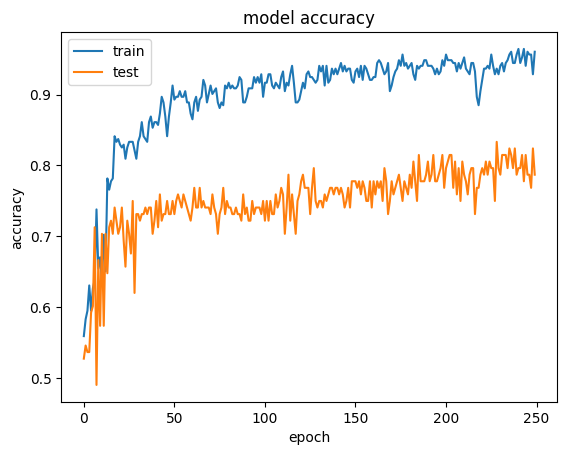

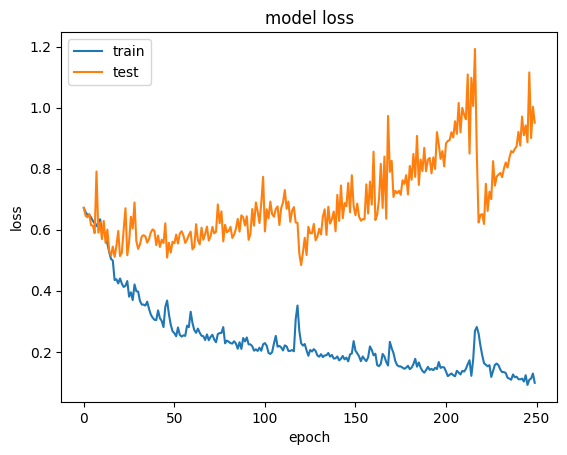

In [ ]:
# summarize history for accuracy (Accuracy Curve)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
fig2 = plt.gcf()
# show the plot
plt.show()
#Save figure
#fig2.savefig('C:/Users/RAIAN/Desktop/Ongoing Task/EEG Driving/Result and Discussion/Deep Learning/Subject 3/Accuracy Curve/LSTM_Accuracy Curve.png', dpi=500)
#fig2.savefig('C:/Users/RAIAN/Desktop/Ongoing Task/EEG Driving/Result and Discussion/Deep Learning/All Subject/Accuracy Curve/LSTM_ACC Curve.png', dpi=500)

# summarize history for loss (Loss Curve)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
fig1 = plt.gcf()
# show the plot
plt.show()
#Save figure
#fig1.savefig('C:/Users/RAIAN/Desktop/Ongoing Task/EEG Driving/Result and Discussion/Deep Learning/Subject 3/Loss Curve/LSTM_Loss Curve.png', dpi=500)
#fig1.savefig('C:/Users/RAIAN/Desktop/Ongoing Task/EEG Driving/Result and Discussion/Deep Learning/All Subject/Loss Curve/LSTM_Loss Curve.png', dpi=500)


In [ ]:
# predict probabilities for test set
yhat_probs = model.predict(X_test, verbose=0)
# convert probabilities to crisp classes using a threshold (e.g., 0.5)
yhat_classes = (yhat_probs > 0.5).astype(int)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]


In [ ]:
# Results for LSTM

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

Accuracy: 0.787037
Precision: 0.703704
Recall: 0.844444
F1 score: 0.767677
ROC AUC: 0.839153
[[47 16]
 [ 7 38]]


In [ ]:
#Loading and preparing the Dataset for 1D-CNN

df=df.drop(['Mode','Mean','Skewness','Median'],axis=1)

#Normalization
dataf=((df-df.min())/(df.max()-df.min()))
dataf

#Test and train
X=dataf.drop(['Class'], axis = 1)
y=dataf.Class

X.shape


(360, 5)

In [ ]:
# 1D CNN Model

model2 = Sequential()
model2.add(Convolution1D(filters=64, kernel_size=3, input_shape=(5,1),activation= "relu",kernel_regularizer=regularizers.l2(0.01)))
model2.add(Convolution1D(filters=32, kernel_size=1, activation='relu',kernel_regularizer=regularizers.l2(0.01)))

model2.add(MaxPool1D(pool_size=2))
#model.add(Dropout(0.5))
model2.add(Flatten())
model2.add(Dense(50, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
#model.add(Dense(2500, activation='relu'))
#model.add(Dropout(0.2))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(optimizer= 'adam',
                loss = 'binary_crossentropy',
                metrics = ['accuracy'] )

history2= model2.fit(X_train,y_train, epochs=250, verbose=0, batch_size=32, validation_data=(X_test,y_test))

In [ ]:
# predict probabilities for test set
yhat_probs2 = model2.predict(X_test, verbose=0)
# convert probabilities to crisp classes using a threshold (e.g., 0.5)
yhat_classes2 = (yhat_probs2 > 0.5).astype(int)
# reduce to 1d array
yhat_probs2 = yhat_probs2[:, 0]
yhat_classes2 = yhat_classes2[:, 0]


In [ ]:
# Results for 1D CNN

# accuracy: (tp + tn) / (p + n)
accuracy2 = accuracy_score(y_test, yhat_classes2)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision2 = precision_score(y_test, yhat_classes2)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall2 = recall_score(y_test, yhat_classes2)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f12 = f1_score(y_test, yhat_classes2)
print('F1 score: %f' % f1)
# ROC AUC
auc2 = roc_auc_score(y_test, yhat_probs2)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix2 = confusion_matrix(y_test, yhat_classes2)
print(matrix)

Accuracy: 0.787037
Precision: 0.703704
Recall: 0.844444
F1 score: 0.767677
ROC AUC: 0.839153
[[47 16]
 [ 7 38]]


In [ ]:
# Prepare Data for ANN Model
#Test and train
X_new=dataf.drop(['Class'], axis = 1)
y_new=dataf.Class

X_new.shape

(360, 5)

In [ ]:
# Select train-test split size

test_size = 0.3
seed = 42
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_new, y_new, test_size=test_size, random_state=seed)

X_train2.shape

(252, 5)

In [ ]:
#ANN Model

model3 = Sequential()
model3.add(Dense(500, input_dim=5, activation='relu',kernel_regularizer=regularizers.l2(0.015)))
#model.add(Dropout(0.2))

model3.add(Dense(250, activation='relu'))
#model.add(Dropout(0.05))

#model.add(Dense(2500, activation='relu'))
#model.add(Dropout(0.2))

#model.add(Dense(2000, activation='relu'))

model3.add(Dense(1, activation='sigmoid'))

model3.compile(optimizer= 'adam',
                loss = 'binary_crossentropy',
                metrics = ['accuracy'] )

history3= model3.fit(X_train2,y_train2, epochs=250, verbose=0, batch_size=64, validation_data=(X_test2,y_test2))

In [ ]:
# predict probabilities for test set
yhat_probs3 = model3.predict(X_test, verbose=0)
# convert probabilities to crisp classes using a threshold (e.g., 0.5)
yhat_classes3 = (yhat_probs3 > 0.5).astype(int)
# reduce to 1d array
yhat_probs3 = yhat_probs3[:, 0]
yhat_classes3 = yhat_classes3[:, 0]


In [ ]:
# Results for ANN

# accuracy: (tp + tn) / (p + n)
accuracy3 = accuracy_score(y_test2, yhat_classes3)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision3 = precision_score(y_test2, yhat_classes3)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall3 = recall_score(y_test2, yhat_classes3)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f13 = f1_score(y_test2, yhat_classes3)
print('F1 score: %f' % f1)
# ROC AUC
auc3 = roc_auc_score(y_test2, yhat_probs3)
print('ROC AUC: %f' % auc3)
# confusion matrix
matrix3 = confusion_matrix(y_test2, yhat_classes3)
print(matrix)

Accuracy: 0.787037
Precision: 0.703704
Recall: 0.844444
F1 score: 0.767677
ROC AUC: 0.500000
[[47 16]
 [ 7 38]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


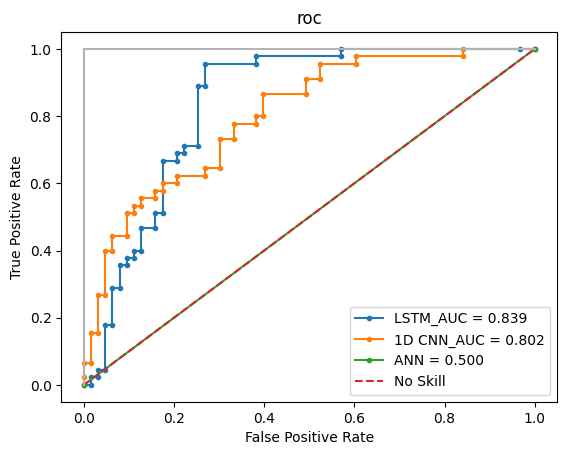

In [ ]:
# ROC-AUC for All Three Models

false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, yhat_probs)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, yhat_probs2)
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_test2, yhat_probs3)
#plt.subplots(1, figsize=(6,5))
plt.title('roc')
plt.plot(false_positive_rate1, true_positive_rate1, marker='.', label='LSTM_AUC = %0.3f' %auc)
plt.plot(false_positive_rate2, true_positive_rate2, marker='.', label='1D CNN_AUC = %0.3f' %auc2)
plt.plot(false_positive_rate3, true_positive_rate3, marker='.', label='ANN = %0.3f' %auc3)
plt.plot([0, 1], ls="--",label='No Skill')
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
fig3 = plt.gcf()
# show the plot
plt.show()

In [ ]:
import numpy as np

def perform_maximum_voting(c1,c2,c3):
    class_counts=[0,0]
    class_counts[c1]+=1
    class_counts[c2]+=1
    class_counts[c3]+=1

    """
    Perform maximum voting to determine the final prediction.

    Args:
    - predictions: A list of arrays containing predicted classes from multiple models.

    Returns:
    - final_prediction: The final prediction based on maximum voting.
    """
    # Combine predicted classes from all models
    final_prediction_index = class_counts.index(max(class_counts))
    return final_prediction_index



In [ ]:
# Make predictions using each model for the chosen test sample
test_sample = X_train[15:16]
yhat_classes1 = (model.predict(test_sample, verbose=0) > 0.5).astype(int)
yhat_classes2 = (model2.predict(test_sample, verbose=0) > 0.5).astype(int)
yhat_classes3 = (model3.predict(test_sample, verbose=0) > 0.5).astype(int)
yhat_classes1 = yhat_classes1.item()
yhat_classes2 = yhat_classes2.item()
yhat_classes3 = yhat_classes3.item()

final_prediction = perform_maximum_voting(yhat_classes1, yhat_classes2, yhat_classes3)

print("Final Prediction (Maximum Voting):", final_prediction)
if final_prediction==1:
  gps_locator()


Final Prediction (Maximum Voting): 1
You Are in Coimbatore,Tamil Nadu
Your latitude = 11.0055 and longitude = 76.9661
Hospital: Coimbatore Corporation Maternity Centre
Distance: 0.17 km
Google Maps Link: https://www.google.com/maps/search/?api=1&query=11.0068267,76.9668812

Hospital: Dr. S. G. Rajarathinam Hospital
Distance: 0.64 km
Google Maps Link: https://www.google.com/maps/search/?api=1&query=11.0095256,76.9619316

Hospital: Seethalakshmi Maternity Hospital
Distance: 0.67 km
Google Maps Link: https://www.google.com/maps/search/?api=1&query=11.0065379,76.9600631

Hospital: K. G. Hospital, Coimbatore
Distance: 0.82 km
Google Maps Link: https://www.google.com/maps/search/?api=1&query=11.0004227,76.9715023

Hospital: M. V. Eye Care Centre
Distance: 0.90 km
Google Maps Link: https://www.google.com/maps/search/?api=1&query=11.0129421,76.9629608

Hospital: Mak Hospital
Distance: 0.94 km
Google Maps Link: https://www.google.com/maps/search/?api=1&query=11.008435,76.9580134

Hospital: Dr K